# Climate Models
In this module we are are going to model the temperature of the earth at increasing levels of complexity. 

## The Snowball Earth Paradox

650 million years ago, scientists believe that the earth was entirely covered in ice, a global snowball earth. UVic scientist Paul Hoffman actually won the prestiguous Kyoto prize in part for the evidence of equitorial glaciation demonstrating the snowball earth hypothesis: https://news.uvic.ca/2024/hoffman-wins-kyoto-prize-for-early-earth-revelations/. But there is a problem. A snowball earth is much more reflective, so more of the sun's energy bounces away, keeping the earth colder. So how then did we escape this global snowball?

## Level 1: Energy Balance Model.

Our simplest model of the earth's temperature comes from a single equation: 

$$\frac{d}{dt} Heat = \text{net incoming radiation - outgoing radiation}$$

Here's a diagram of the simplest processes:

<img src="EnergyBalance1.png" alt="Plot " width="600"/>


Incoming radiation comes from the sun. Incoming radiation from the sun is given by $S_0\approx 1361\ watts/m^2$. However, two adjustments need to be made. Firstly, only a portion of this radiation is absorbed by the earth, and the rest bounced back into the atmosphere. For instance, ice is particularly reflective. As a global average, let $\alpha\approx 0.3$ represent the proportion of the income radiation that is reflected and so $S_0(1-\alpha)$ is the proportion absorbed. 

Secondly, when sun looks at the earth it "sees" a circle, which has area $\pi R^2$ where $R$ is the radius of the earth. However, the earth is a sphere which is spinning and this radiation gets distributed out over the surface of the earth across a day. The earth has surface area approximately $4\pi R^2$. Hence our original formula is off by a factor of $4$ and so the net incoming radiation term is $\frac{S_0}{4}(1-\alpha)$. Note that in our level 4 model, we will not use a global average and instead model how different lattitude bands of the earth receive different levels of incoming radiation. 

For the outgoing radiation, we use a principle from physics called a "black body" which emits radiation per unit area proportional to $\sigma T^4$ where $\sigma\approx 5.66961\times 10^{-8} Wm^{-2}K^{-4}$ is the Stefan-Boltzmann constant and $T$ the surface temperature of the earth. Thus our energy balance model is:

$$\frac{d}{dt}\text{Heat}=\frac{S_0}{4}(1-\alpha)-\sigma T^4$$

### Solving for the earth's Temperature:
If our earth is at equilibrium (i.e $\displaystyle\frac{d\text{Heat}}{dt}=0$), we thus need to solve $\frac{S_0}{4}(1-\alpha)-\sigma T^4$ for $T$ giving

$$T=\left(\frac{S_0(1-\alpha)}{4\sigma}\right)^{1/4}.$$

We can plug in the known values and compute:


In [2]:
import numpy as np
S = 1368
sigma = 5.670374419e-8
alpha=0.3

T=((S*(1-alpha)/4)/sigma)**(1/4)-273
print(T)

-18.095147875507536


Uhoh, that is far too cold. 

## Level 2: Adding an Atmosphere

One of the reasons the above model was too cold is that it ignored the greenhouse effect our atmosphere provides. Let's add one to our model. We will treat the atmosphere as a single layer. More complicated models might break the atmosphere into multiple height layers, but we will just do one. 

Incoming radiation from the sun is primarily shortwave radiation, and this easily passes through the atmosphere without being absorbed until it hits the earth. We'll assume zero absorbtion by the atmosphere. 

The outgoing radiation from the earth is primarily longwave radiation and it *can* be absorbed by the atmosphere. However, it is not a perfect black body (the earth is also not perfect, but much closer to one) and so we will let $\epsilon$ denote emissivity, that is the fraction of the longwave radiation that is absorbs and similarly that same value $\epsilon$ is the fraction the atomosphere will emit back, relative to if it was a perfect black body. This value depends on the composition of the atmosphere (for instance, higher levels of greenhouse gases make for a higher value of $\epsilon$) but we'll use the value of $0.75$ which represents a preindustrial climate, as per Tziperman (see references below). Here's a diagram of the processes:

<img src="EnergyBalance2.png" alt="Plot " width="600"/>

We thus now have two temperatures, the original $T$ which is the surface temperature of the earth and $T_a$ which is the temperature of our one-layer atmosphere. We then get two energy balance equations:

$$\frac{S_0}{4}(1-\alpha)+\epsilon\sigma T_a^4=\sigma T^4$$
$$\epsilon\sigma T^4=2\epsilon\sigma T_a^4$$

The first represents the energy balance equation for the earth, modified to now include the addition of radiation $\epsilon\sigma T_a^4$ hitting the earth from the atmosphere. The second represents the energy balance for the atmosphere, which as an input absorbs a portion of the outgoing radiation from the earth $\epsilon\sigma T^4$ and then emits both a proportion both out to the atmosphere and back down to earth (hence the $2$).

Plugging the second equation into the first gives:

$$\frac{S_0}{4}(1-\alpha)+\frac{\epsilon}{2}\sigma T^4=\sigma T^4.$$

Once again, we can solve for $T$ and plug in the numbers: 


In [7]:
epsilon=0.75
T=(S*(1-alpha)/(4*sigma*(1-epsilon/2)))**(1/4)-273
print(T)

13.687064682274126


That value is much closer to the actual average earth temperature of approximately $15\degree C$ today. It's actually quite remarkably close given how many simplifying assumptions are implicitly in our model (such as using a global average on a homogeneous earth and a single layer atmosphere). 

### Sensitivity to Emissivity
To get a sense for how quickly things can change by making small tweaks to the parameters, reevaluate the above code with $\epsilon=0.78$ instead (our estimate of 0.75 was preindustrial). Now we are right at $15\degree C$! While we can't control other parameters such as $S_0$ coming from the sun, the emissivity $\epsilon$ is the parameter that our emissions directly affects. 


## Level 3: Variable Albedo
One limitation of our previous models was presuming a constant albedo. For instance, ice caps are much more reflective than oceans or land not covered in ice. Even if we keep using a global average, the amount of ice on the earth changes over the millenia as a function of the temperature of the earth.

Before we try to model this, there is an immediate problem. If the earth got really cold, there would be a lot of ice resulting in a higher overall albedo leading to less heat absorbed and creating a feedback loop that kept the planet very cold. Conversely, if the earth got really hot, there would be perhaps no ice resulting in a lower overall albedo leading to more heat absorbed and creating a feedback loop that kept the planet very hot. In fact, both events have occured in earth's geological past: periods where earth is almost entirely covered in ice (a "snowball earth") and where earth has no permanent ice caps at the polls (a "greenhouse earth"). Yet here we are today in this middle state with some ice - remarkable!

We can account for this by instead of using a constant $\alpha$, using a piecewise defined function of $T$:

$$\alpha(T)=\begin{cases} \alpha_1\ \ \ if\ T< T_1\\ \alpha_1+(\alpha_2-\alpha_1)\frac{T-T_1}{T_2-T_1}\ \ \ if\ T_2>T>T_1\\ \alpha_2\ \ \ T\geq \alpha_2 \end{cases}$$

Let's implement this piecewise function and plot it in the next code block, using $alpha_1=0.5$ for a fully frozen planet when temperature are less than $-10\degree C$, and $\alpha=0.3$ for a fully melted planet when temperature are over $10\degree C$. These are just approximations, but you can play with the code later to see it doesn't make a huge difference if you wiggle those temperature values around. 




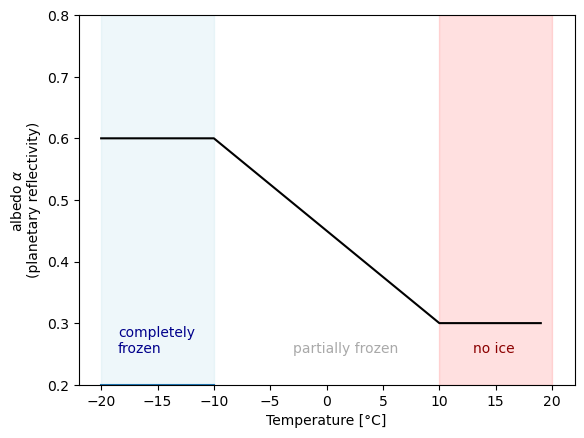

In [16]:
#This code adapted from https://iow-lectures.pages.io-warnemuende.de/climateoftheearth/exercise/03_ice-albedo.html
import numpy as np
import matplotlib.pyplot as plt

def calc_alpha(T, alpha0=0.3, alphai = 0.6, deltaT=10.):
    if T < - deltaT:
        return alphai
    elif -deltaT <= T < deltaT:
        return alphai + (alpha0 - alphai)*(T + deltaT) / (2*deltaT)
    elif T >= deltaT:         
        return alpha0

calc_alpha_vec = np.vectorize(calc_alpha) # boolean evaluations need to be vectorized
T_example = np.arange(-20, 20)
plt.plot(T_example, calc_alpha_vec(T_example[:]), color = "black")
plt.ylim(0.2,0.8)
plt.plot([-20, -10], [0.2, 0.2])
plt.fill_between([-20, -10], y1=0.2, y2=0.8, color = "lightblue", alpha = 0.2)
plt.fill_between([10, 20], y1=0.2, y2=0.8, color = "red", alpha = 0.12)
plt.ylabel("albedo $α$\n(planetary reflectivity)")
plt.xlabel("Temperature [°C]")
plt.text(-18.5, 0.252, s="completely\nfrozen", size=10, color="darkblue")
plt.text(-3, 0.252, s="partially frozen", size=10, color="darkgrey")
plt.text(13, 0.252, s="no ice", size=10, color="darkred");
       

## Evolution in Time
Now let's study how a planet satisfying the above variable albedo might evolve over time. Let's study the full differential equation, not just the equilibirum solution:

$$C_p \frac{dT}{dt}=\frac{S_0}{4}(1-\alpha(T))-\tilde{\sigma} T^4.$$

I've made three modifications from before:
1) Instead of $\displaystyle\frac{d\text{Heat}}{dt}$ I've converted from Heat to Temperature which introduces a constant from physics called the heat capacity $C_p$.
2) For simplicity, I combined the $T^4$ terms from our one-layer atmosphere model with a new coefficient $\tilde{\sigma}=(1-\epsilon/2)$
3) The fixed $\alpha$ is now a function of $T$.

The below code runs a simple Euler method to numerically solve the ODE and plot the result for a range of different initial conditions. 

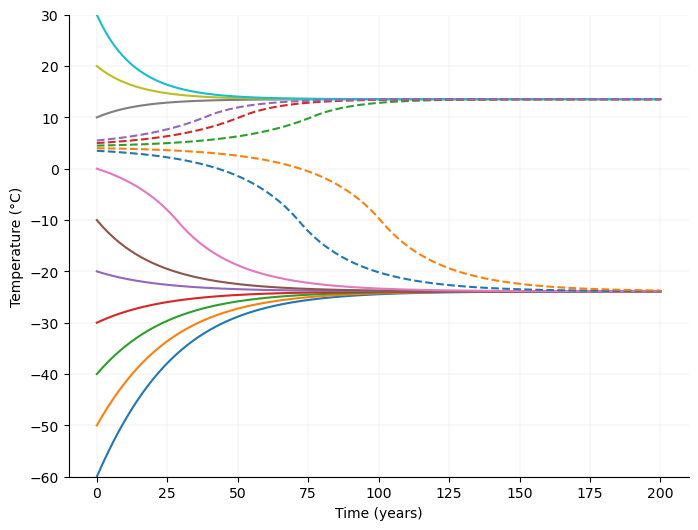

In [23]:
#This code adapted from https://iow-lectures.pages.io-warnemuende.de/climateoftheearth/exercise/03_ice-albedo.html
import numpy as np
import matplotlib.pyplot as plt

alpha0 = 0.3   # albedo at high temperatures (T ≥ Tmax)
alpha1 = 0.6   # albedo at low temperatures (T ≤ Tmin)
Tmin = -10.0   # lower threshold (°C)
Tmax = 10.0    # upper threshold (°C)
Cp=51
S0=1368
sigma_eff=(1 - 0.75/2) * 5.67e-8

# --- albedo as a function of T (°C) ---
def alpha(T):
    if T <= Tmin:
        return alpha1
    elif T >= Tmax:
        return alpha0
    else:
        return alpha1 + (alpha0 - alpha1) * (T - Tmin) / (Tmax - Tmin)
class EBM:
  
    def __init__(self, T0, dt):
        self.T = np.array([T0])   # initial temperature (°C)
        self.t = np.array([0.0])  # time in years
        self.dt = dt              # timestep in years

    def tendency(self):
        T = self.T[-1]
        absorbed = S0 * (1 - alpha(T)) / 4.0
        outgoing = sigma_eff * (T + 273.15)**4
        return (absorbed - outgoing) / Cp

    def step(self):
        dT = self.tendency() * self.dt
        self.T = np.append(self.T, self.T[-1] + dT)
        self.t = np.append(self.t, self.t[-1] + self.dt)

    def run(self, years):
        for _ in range(int(years / self.dt)):
            self.step()
            


# --- run and plot ---
if __name__ == '__main__':
    # prepare figure with transparent background
    fig, ax = plt.subplots(figsize=(8, 6), facecolor='none')
    ax.set_facecolor('none')

    # initial temperature ensemble
    original_temps = list(range(-60, 31, 10))
    extra_temps = [3.5, 4.0, 4.5, 5.0, 5.5]
    #extra_temps=[]
    initial_temps = original_temps + extra_temps

    for T0 in initial_temps:
        model = EBM(T0, dt=1.0)
        model.run(200)
        linestyle = '--' if T0 in extra_temps else '-'
        ax.plot(model.t, model.T, linestyle=linestyle)
    ax.plot([0, 200], [0, 0], alpha=0)
    # style axes for dark/transparency
    ax.set_xlabel('Time (years)', color='black')
    ax.set_ylabel('Temperature (°C)', color='black')
    ax.tick_params(colors='black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True, color='lightgrey', linewidth=0.2)
    ax.set_ylim(-60, 30)

    # save as transparent PNG
    fig.savefig('ebm_temperature_evolution_none.png', dpi=300, transparent=True)

    plt.show()


What we can see from the above plot is that for initial temperatures above about $7\degree C$, we approach the stable no ice equilibrium of about $14\degree C$, and for temperatures below that we descend to the stable ice equilibirum of about $-22\degree C$. Note that we are still imagining a homogeneous world with respect to lattitude so while our actual earth has about 10% ice coverage at the poles, according to this model we should be fully ice free. However, it still isn't bad, as the global average temperature is close to accurate. 

## Level 4: Lattitude Bands

One of the core problems with our previous model was that it assumed a homogeneous earth. Now let's break it up into lattitude bands. Each lattitude band has its own amount of solar radition $S_i$ (for example a band near the poles receives less than near the equator), it's own albedo $\alpha_i$, and its own temperature $T_i$. However, each band isn't independent from the others as wind and ocean currents move heat from one band to another. A band whose temperature is far from the global average will have a larger net change in heat as this kind of convection occurs. Here's a diagram of the processes:

<img src="EnergyBalance3.png" alt="Plot " width="600"/>
So what we get is a system of ODEs

$$C_p\frac{dT_i}{dt}+F(T_i-T_{avg})=\frac{S_i(1-\alpha_i(T_i))}{4}-\sigma T_i^4$$

Here the coefficient $F-3.8Wm^{-2}\degree C^{-1}$ is called the *Heat Transport Coefficient*, and it represents the transport of heat between layers. 

We can once again solve this model numerically. We use the same variable $\alpha$ as before, one for each band. The only thing that is new is thus $S_i$ which represents the amount of incoming solar radiation each lattitude band gets. To do this we have to account for the tilt of the earth to figure out how much sunlight each lattitude band actually gets. There is some nice MATLAB code that implements this geometry and then numerically solves it, I'll share it here if you are interested: https://math.nyu.edu/~kleeman/one_dim_ebm.html






### Variable Solar Intensity

Given a particular intensity of the sun, the above code computes the equilibrium temperatures of the various lattitude bands.  We can thus model the behaviour as we change the sun's intensity (which has changed over the millenia).

You can first download and then watch the videos AnimatedHorizontalSlicesDOWN.mp4 and AnimatedHorizontalSlicesUP.mp4 to see how the bands change temperature as the sun's intensity is either lowered or raised. But something fascinating emerges: the model gives path dependence! 

<img src="plotsgraph2.png" alt="Plot " width="1150"/>

If the earth starts as a snowball earth, then that feedback loop is going to keep it cool until the sun is much hotter than it is today, around 130% present sun power. Conversely, if the earth starts hot, then that feedback loop keeps it warm and it isn't until about 85% present sun power that everything ices over.

So sun variability is one explanation, but only one of several. My understanding (I'm not a paleoclimatologist!) is that one of the more likely explanations was that increases in volcanic activity created higher greenhouse gases that melted past snowball earths. 



## References
1) The book Global Warming Science by Eli Tziperman, Chapter 2.
2) Much of the code is adapted from https://iow-lectures.pages.io-warnemuende.de/climateoftheearth/exercise/03_ice-albedo.html